# Week 2: Linear regression

For this week we are going to be using the California Housing Prices. Everyone can have access to the dataset in [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

## Loading and selecting data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Select only the desired columns
df = df[[
    'latitude', 
    'longitude', 
    'housing_median_age', 
    'total_rooms', 
    'total_bedrooms', 
    'population', 
    'median_income', 
    'median_house_value'
    ]]

## Exploratory Data Analysis EDA

### Distribution of target variable

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

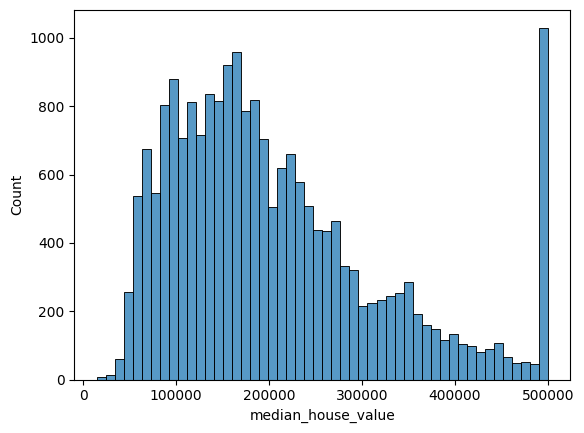

In [4]:
sns.histplot(df.median_house_value, bins=50)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

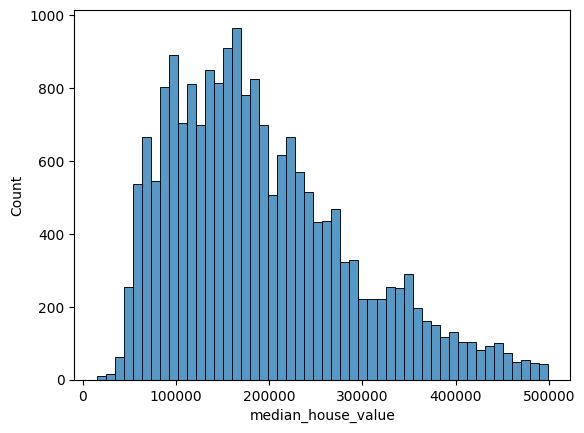

In [5]:
sns.histplot(df.median_house_value[df.median_house_value < 500000], bins = 50)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

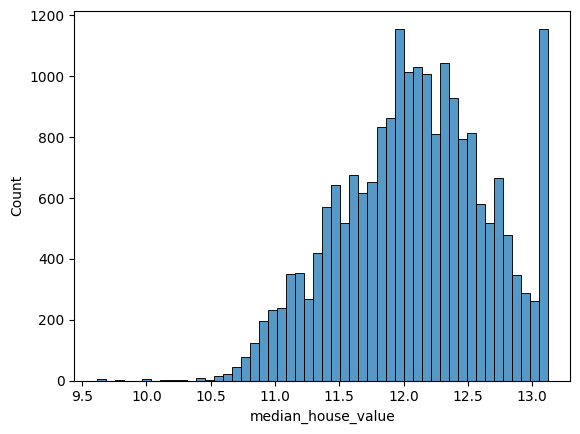

In [6]:
median_house_log_value = np.log1p(df.median_house_value)
sns.histplot(median_house_log_value, bins=50)

### Missing values

In [7]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
median_income           0
median_house_value      0
dtype: int64

### Validation Framework

In [8]:
np.random.seed(42)

n = len(df)

# Validation, train and test values
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled[:n_train].copy()
df_val = df_shuffled[n_train:n_train+n_val].copy()
df_test = df_shuffled[n_train+n_val:].copy()

In [9]:
# Obtaining features
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Linear Regression

In [10]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

### Baseline Model

In [11]:
# Prepare data, if fillmissing = 0 then fillna with 0's else with mean
def prepare_X(df, fillmissing):
    if fillmissing == "0":
        df_p = df.fillna(0)
    elif fillmissing == "mean":
        df_p = df.fillna(df.mean())
    else:
        df_p = df.fillna(df.median())
    X = df_p.values
    return X

# Plot results
def plot_results(y_train, y_pred):
    plt.figure(figsize=(6, 4))

    sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
    sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

    plt.legend()

    plt.ylabel('Frequency')
    plt.xlabel('Log(Price + 1)')
    plt.title('Predictions vs actual distribution')

    plt.show()

# Root mean squared error calcultaion
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

Replacing the missing values with 0's  
As we can see the prediction distribution is centered in the same position of the actual distribution.

RMSE for training, missing replaced with 0's: 0.3447962609094687


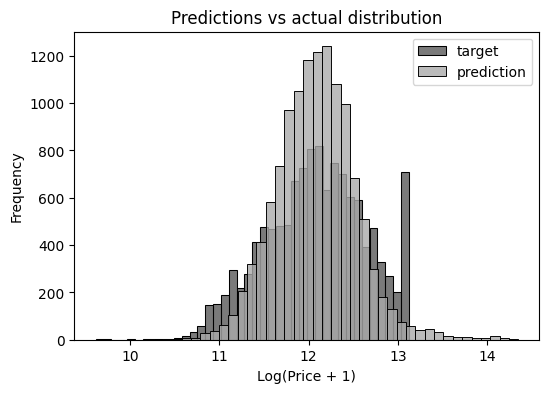

RMSE for validation: 0.33089227738032245


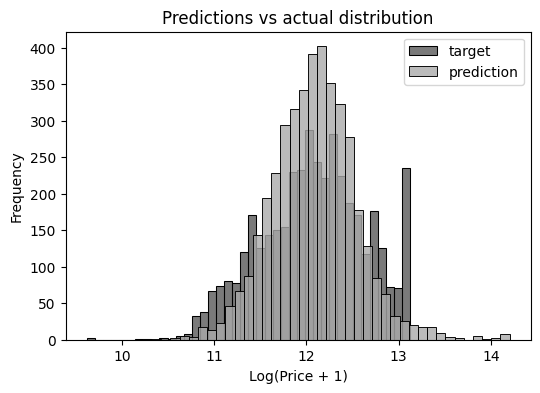

In [12]:
# Model with fillna as 0's
X_train = prepare_X(df_train, fillmissing="0")
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
print(f"RMSE for training, missing replaced with 0's: {rmse(y_train, y_pred)}")
plot_results(y_train, y_pred)

# Validation process
X_val = prepare_X(df_val, fillmissing="0")
y_pred_val = w_0 + X_val.dot(w)
print(f"RMSE for validation: {rmse(y_val, y_pred_val)}")
plot_results(y_val, y_pred_val)

Replacing the missing values with the mean  
The difference between mean an 0's fill is minimum.

RMSE for training, missing replaced with mean: 0.34305184040994313


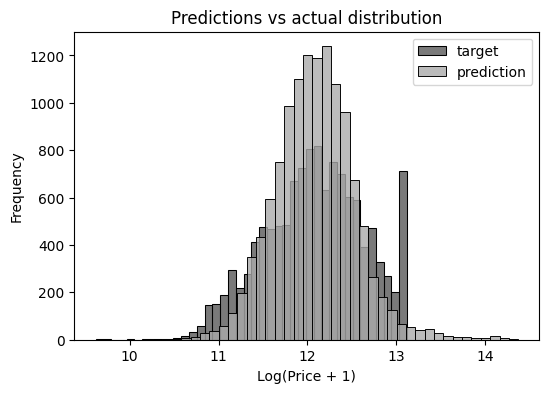

RMSE for validation: 0.3293840986351243


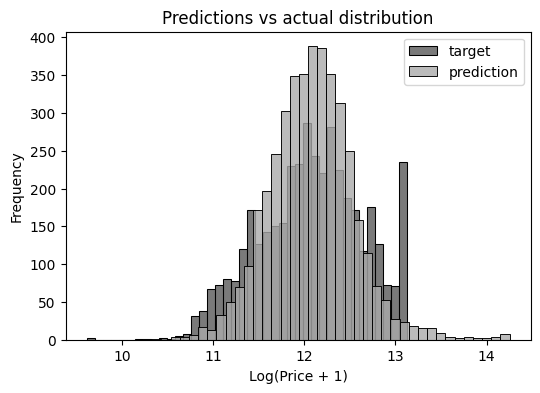

In [13]:
# Model with fillna with mean
X_train = prepare_X(df_train, fillmissing="mean")
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
print(f"RMSE for training, missing replaced with mean: {rmse(y_train, y_pred)}")
plot_results(y_train, y_pred)

# Validation process
X_val = prepare_X(df_val, fillmissing="0")
y_pred_val = w_0 + X_val.dot(w)
print(f"RMSE for validation: {rmse(y_val, y_pred_val)}")
plot_results(y_val, y_pred_val)

Replacing the missing values with the medan  
The difference between mean and 0's fill is minimum.

RMSE for training, missing replaced with median: 0.34315082961113597


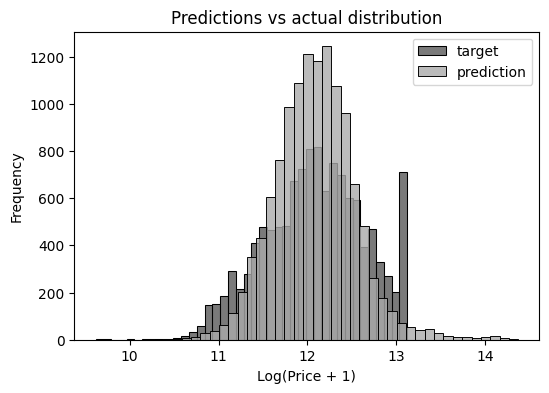

RMSE for validation: 0.3294474193341005


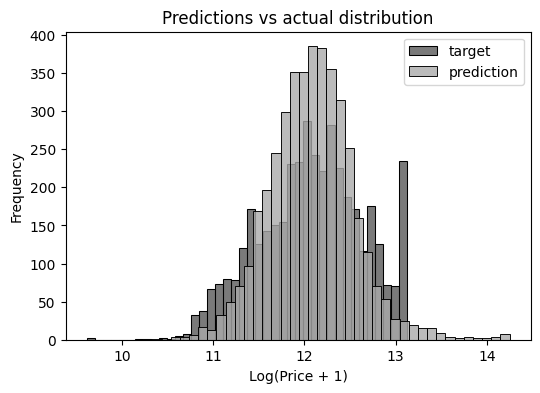

In [14]:
# Model with fillna with median
X_train = prepare_X(df_train, fillmissing="median")
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
print(f"RMSE for training, missing replaced with median: {rmse(y_train, y_pred)}")
plot_results(y_train, y_pred)

# Validation process
X_val = prepare_X(df_val, fillmissing="0")
y_pred_val = w_0 + X_val.dot(w)
print(f"RMSE for validation: {rmse(y_val, y_pred_val)}")
plot_results(y_val, y_pred_val)

### Regularized Linear Regression

In [15]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [17]:
r_param = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
X_train = prepare_X(df_train, fillmissing="0")
X_val = prepare_X(df_val, fillmissing="0")

for r in r_param:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_train.dot(w)
    y_pred_val = w_0 + X_val.dot(w)
    print(f"r: {r}, RMSE (train): {round(rmse(y_train, y_pred), 2)}, RMSE (val): {round(rmse(y_val, y_pred_val), 2)}")

r: 0, RMSE (train): 0.34, RMSE (val): 0.33
r: 1e-06, RMSE (train): 0.34, RMSE (val): 0.33
r: 0.0001, RMSE (train): 0.34, RMSE (val): 0.33
r: 0.001, RMSE (train): 0.34, RMSE (val): 0.33
r: 0.01, RMSE (train): 0.34, RMSE (val): 0.33
r: 0.1, RMSE (train): 0.34, RMSE (val): 0.33
r: 1, RMSE (train): 0.35, RMSE (val): 0.34
r: 5, RMSE (train): 0.36, RMSE (val): 0.34
r: 10, RMSE (train): 0.36, RMSE (val): 0.34
